In [1]:
#LOAD THE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [2]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.load_weights('emotion_model.h5')

OSError: Unable to open file (unable to open file: name = 'emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

# Visualizing intermediate activations (Output of each layer)

In [ ]:
path=os.getcwd()

(1, 48, 48, 1)


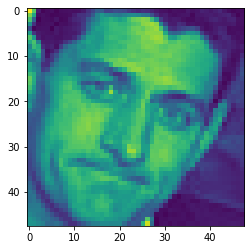

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
  
# Pre-processing the image
img = image.load_img(path+'/dataset/FacialExpression-Dataset/Train/disgust/7.jpg', target_size = (48, 48),color_mode='grayscale')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
    
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
emotion_model.layers

In [ ]:
emotion_model.input

<KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
# Outputs of the  layers
layer_outputs = [layer.output for layer in emotion_model.layers]
activation_model = Model(inputs = emotion_model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  


In [ ]:
for i in activations:
    print(i.shape)

(1, 46, 46, 32)
(1, 44, 44, 64)
(1, 22, 22, 64)
(1, 22, 22, 64)
(1, 20, 20, 128)
(1, 10, 10, 128)
(1, 8, 8, 128)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2048)
(1, 1024)
(1, 1024)
(1, 7)


(1, 46, 46, 32)


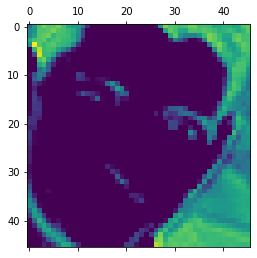

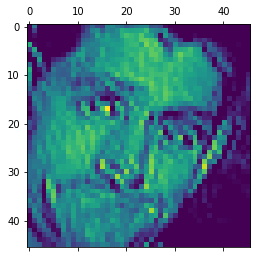

In [ ]:
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6])
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15])

In [ ]:
def display(row,column,value,title,color='binary',figsize=(40,40)):
    c = 0

    fig , ax = plt.subplots(row,column ,figsize=figsize)
    fig.suptitle(title, fontsize=54)
    for i in range(row):
        for j in range(column):
            ax[i,j].imshow(value[0, :, :, c],cmap=color)
            c+=1
    plt.show()

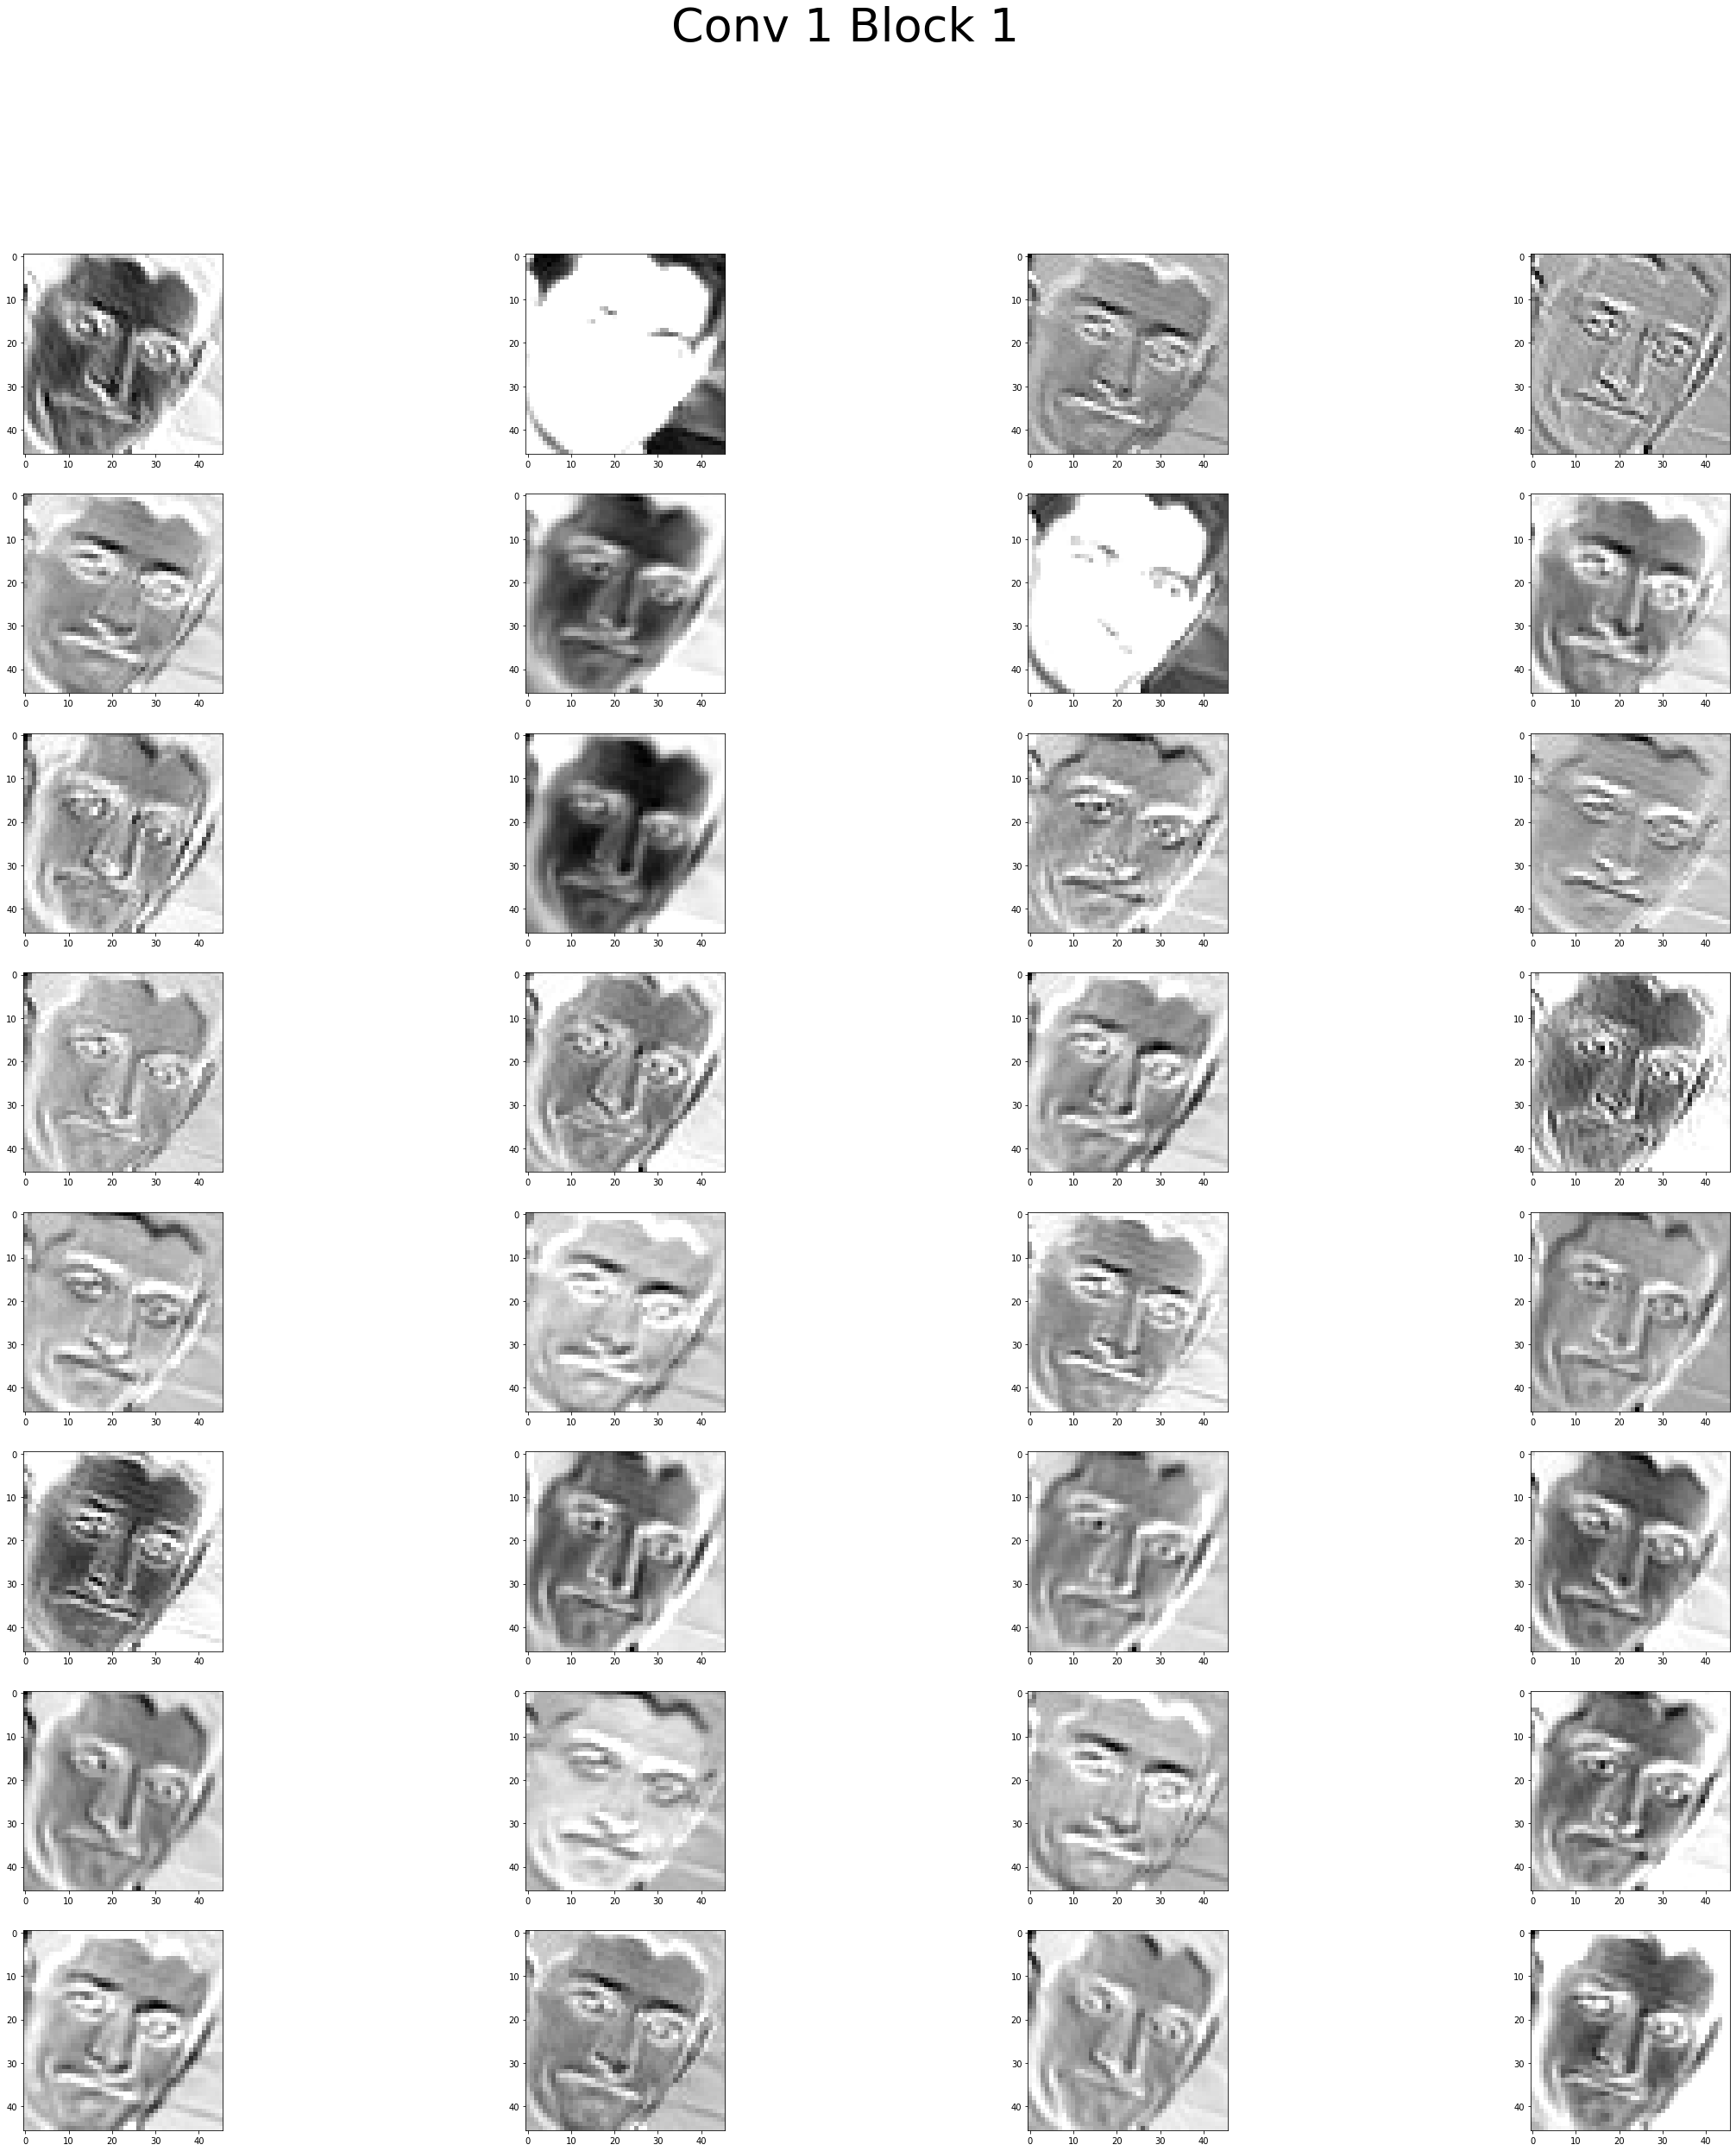

In [ ]:
display(8,4,activations[0],"Conv 1 Block 1")

In [ ]:
for i in activations:
    print(i.shape)

(1, 46, 46, 32)
(1, 44, 44, 64)
(1, 22, 22, 64)
(1, 22, 22, 64)
(1, 20, 20, 128)
(1, 10, 10, 128)
(1, 8, 8, 128)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2048)
(1, 1024)
(1, 1024)
(1, 7)


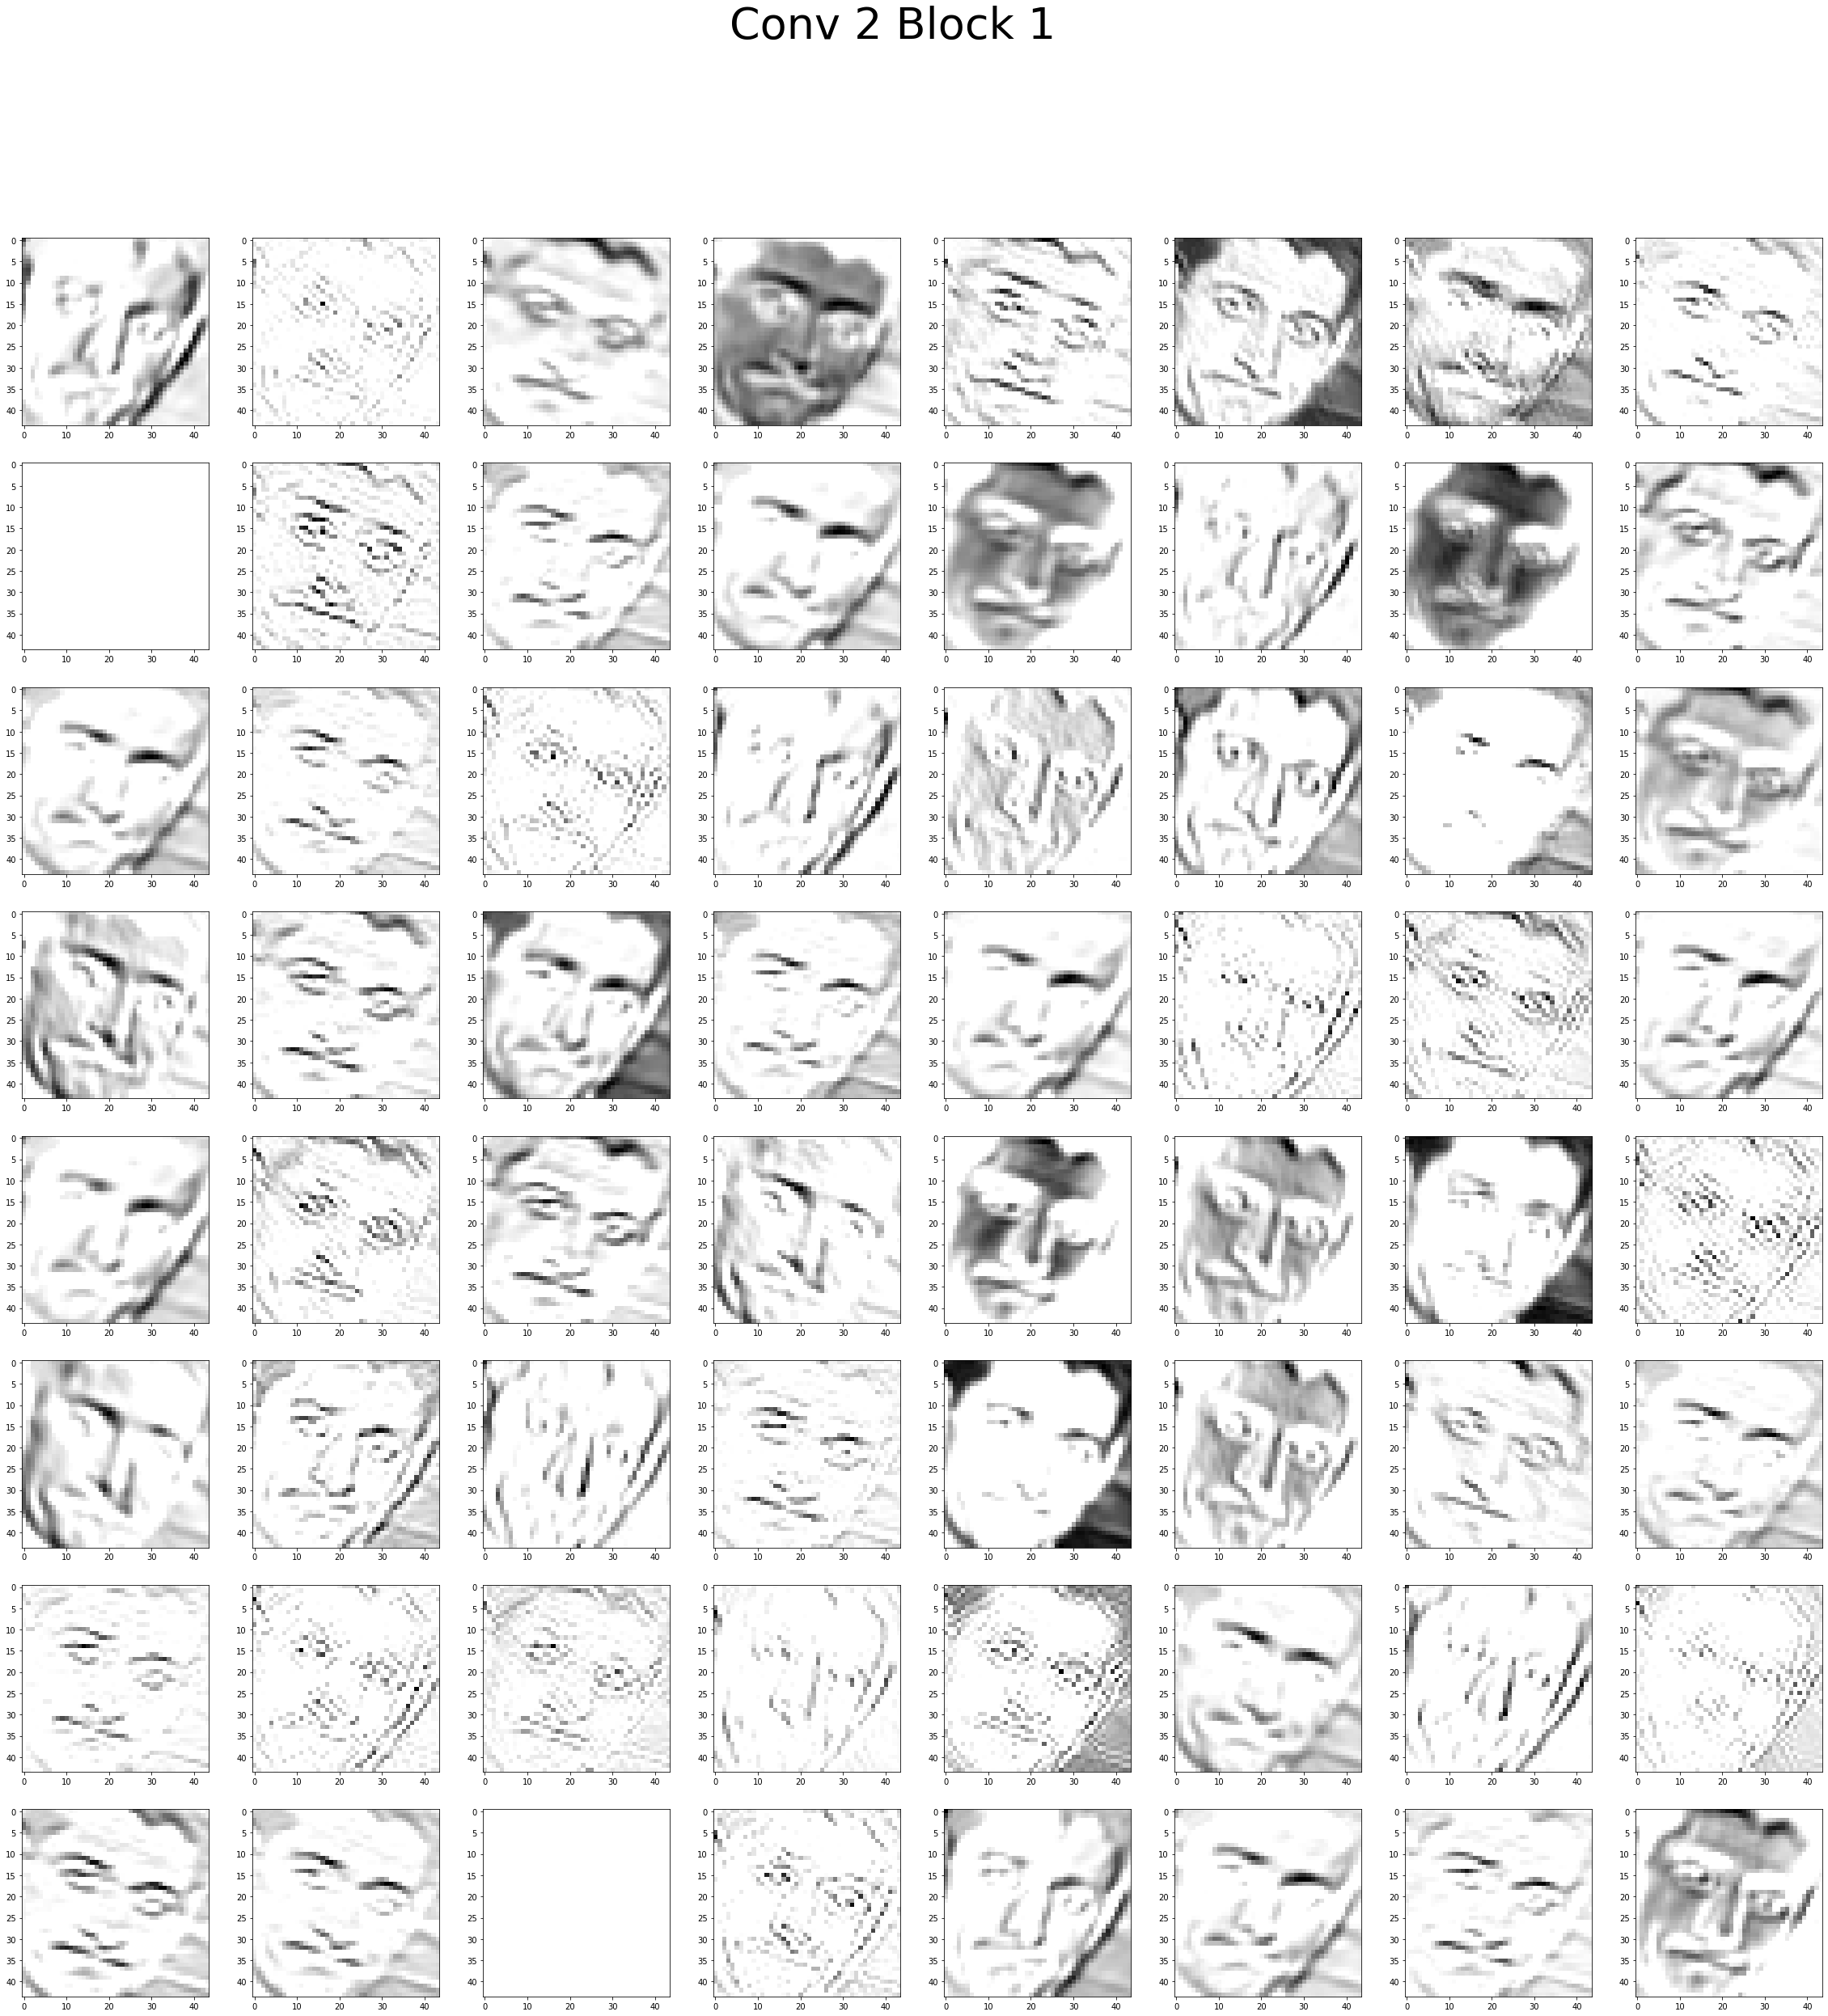

In [ ]:
display(8,8,activations[1],"Conv 2 Block 1")

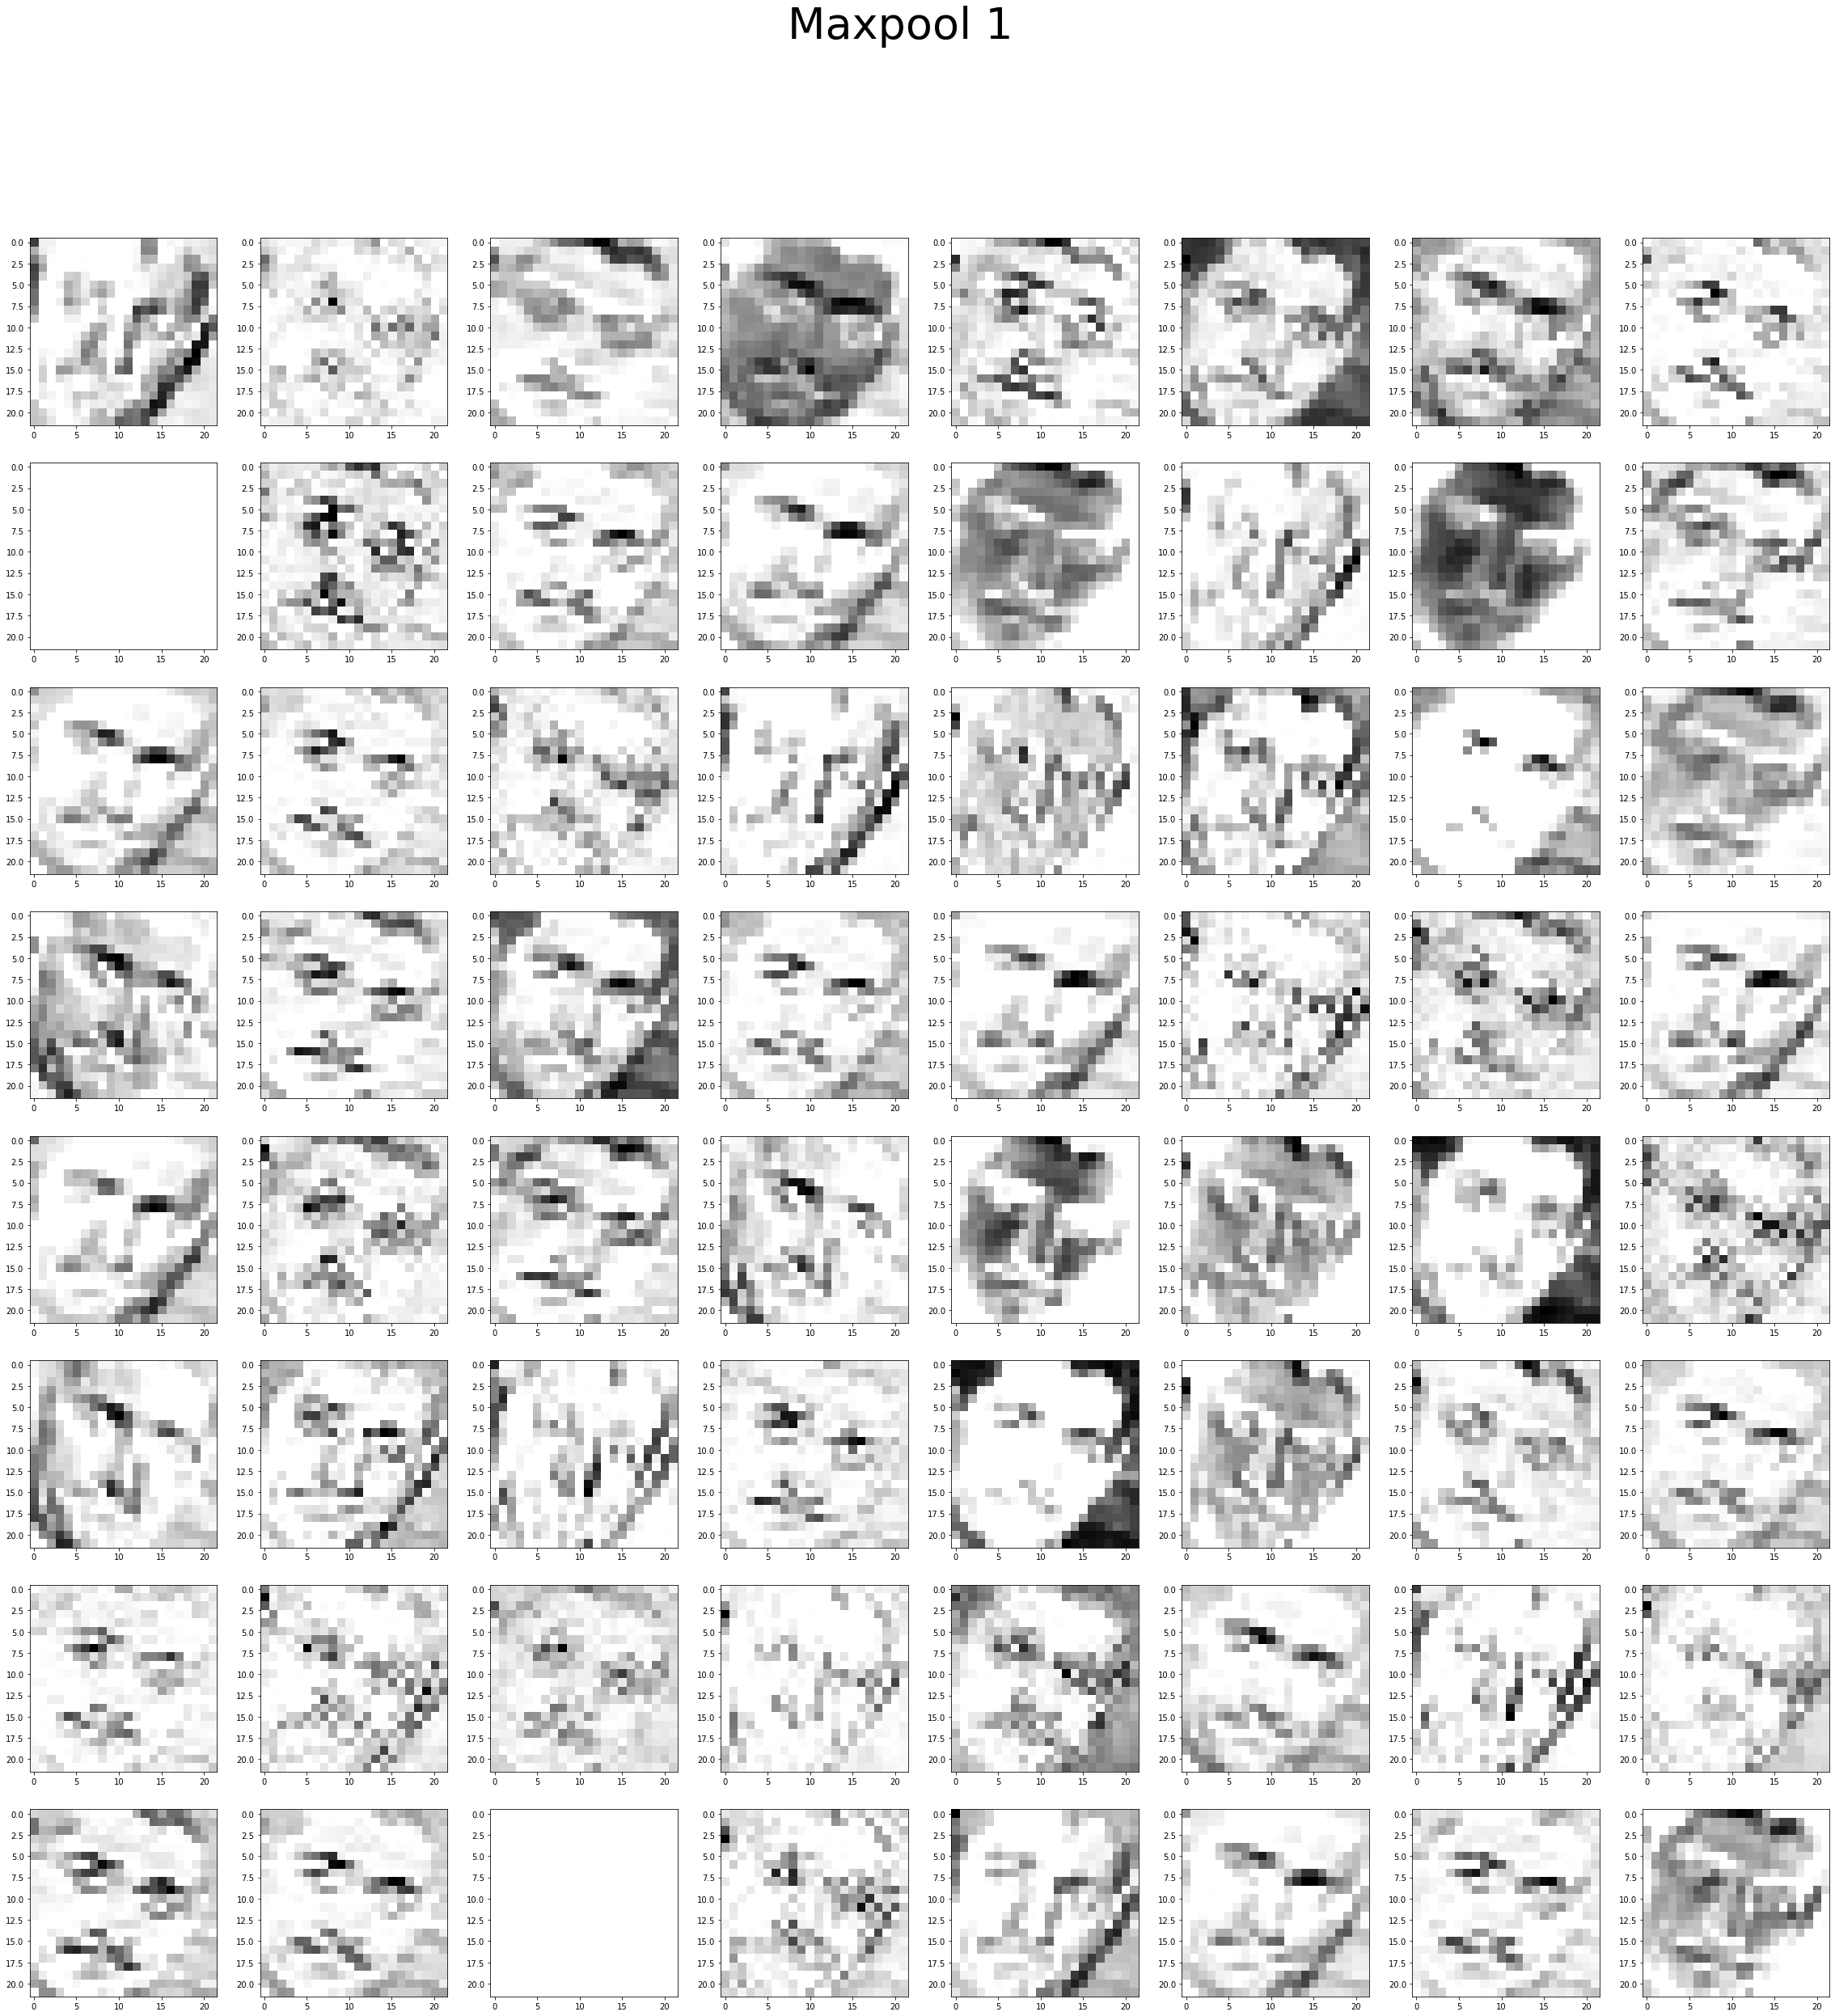

In [ ]:
display(8,8,activations[2],"Maxpool 1")

In [ ]:
for i in emotion_model.layers:
    print(i.name,i.output)

conv2d KerasTensor(type_spec=TensorSpec(shape=(None, 46, 46, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
conv2d_1 KerasTensor(type_spec=TensorSpec(shape=(None, 44, 44, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
max_pooling2d KerasTensor(type_spec=TensorSpec(shape=(None, 22, 22, 64), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
dropout KerasTensor(type_spec=TensorSpec(shape=(None, 22, 22, 64), dtype=tf.float32, name=None), name='dropout/Identity:0', description="created by layer 'dropout'")
conv2d_2 KerasTensor(type_spec=TensorSpec(shape=(None, 20, 20, 128), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")
max_pooling2d_1 KerasTensor(type_spec=TensorSpec(shape=(None, 10, 10, 128), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created 

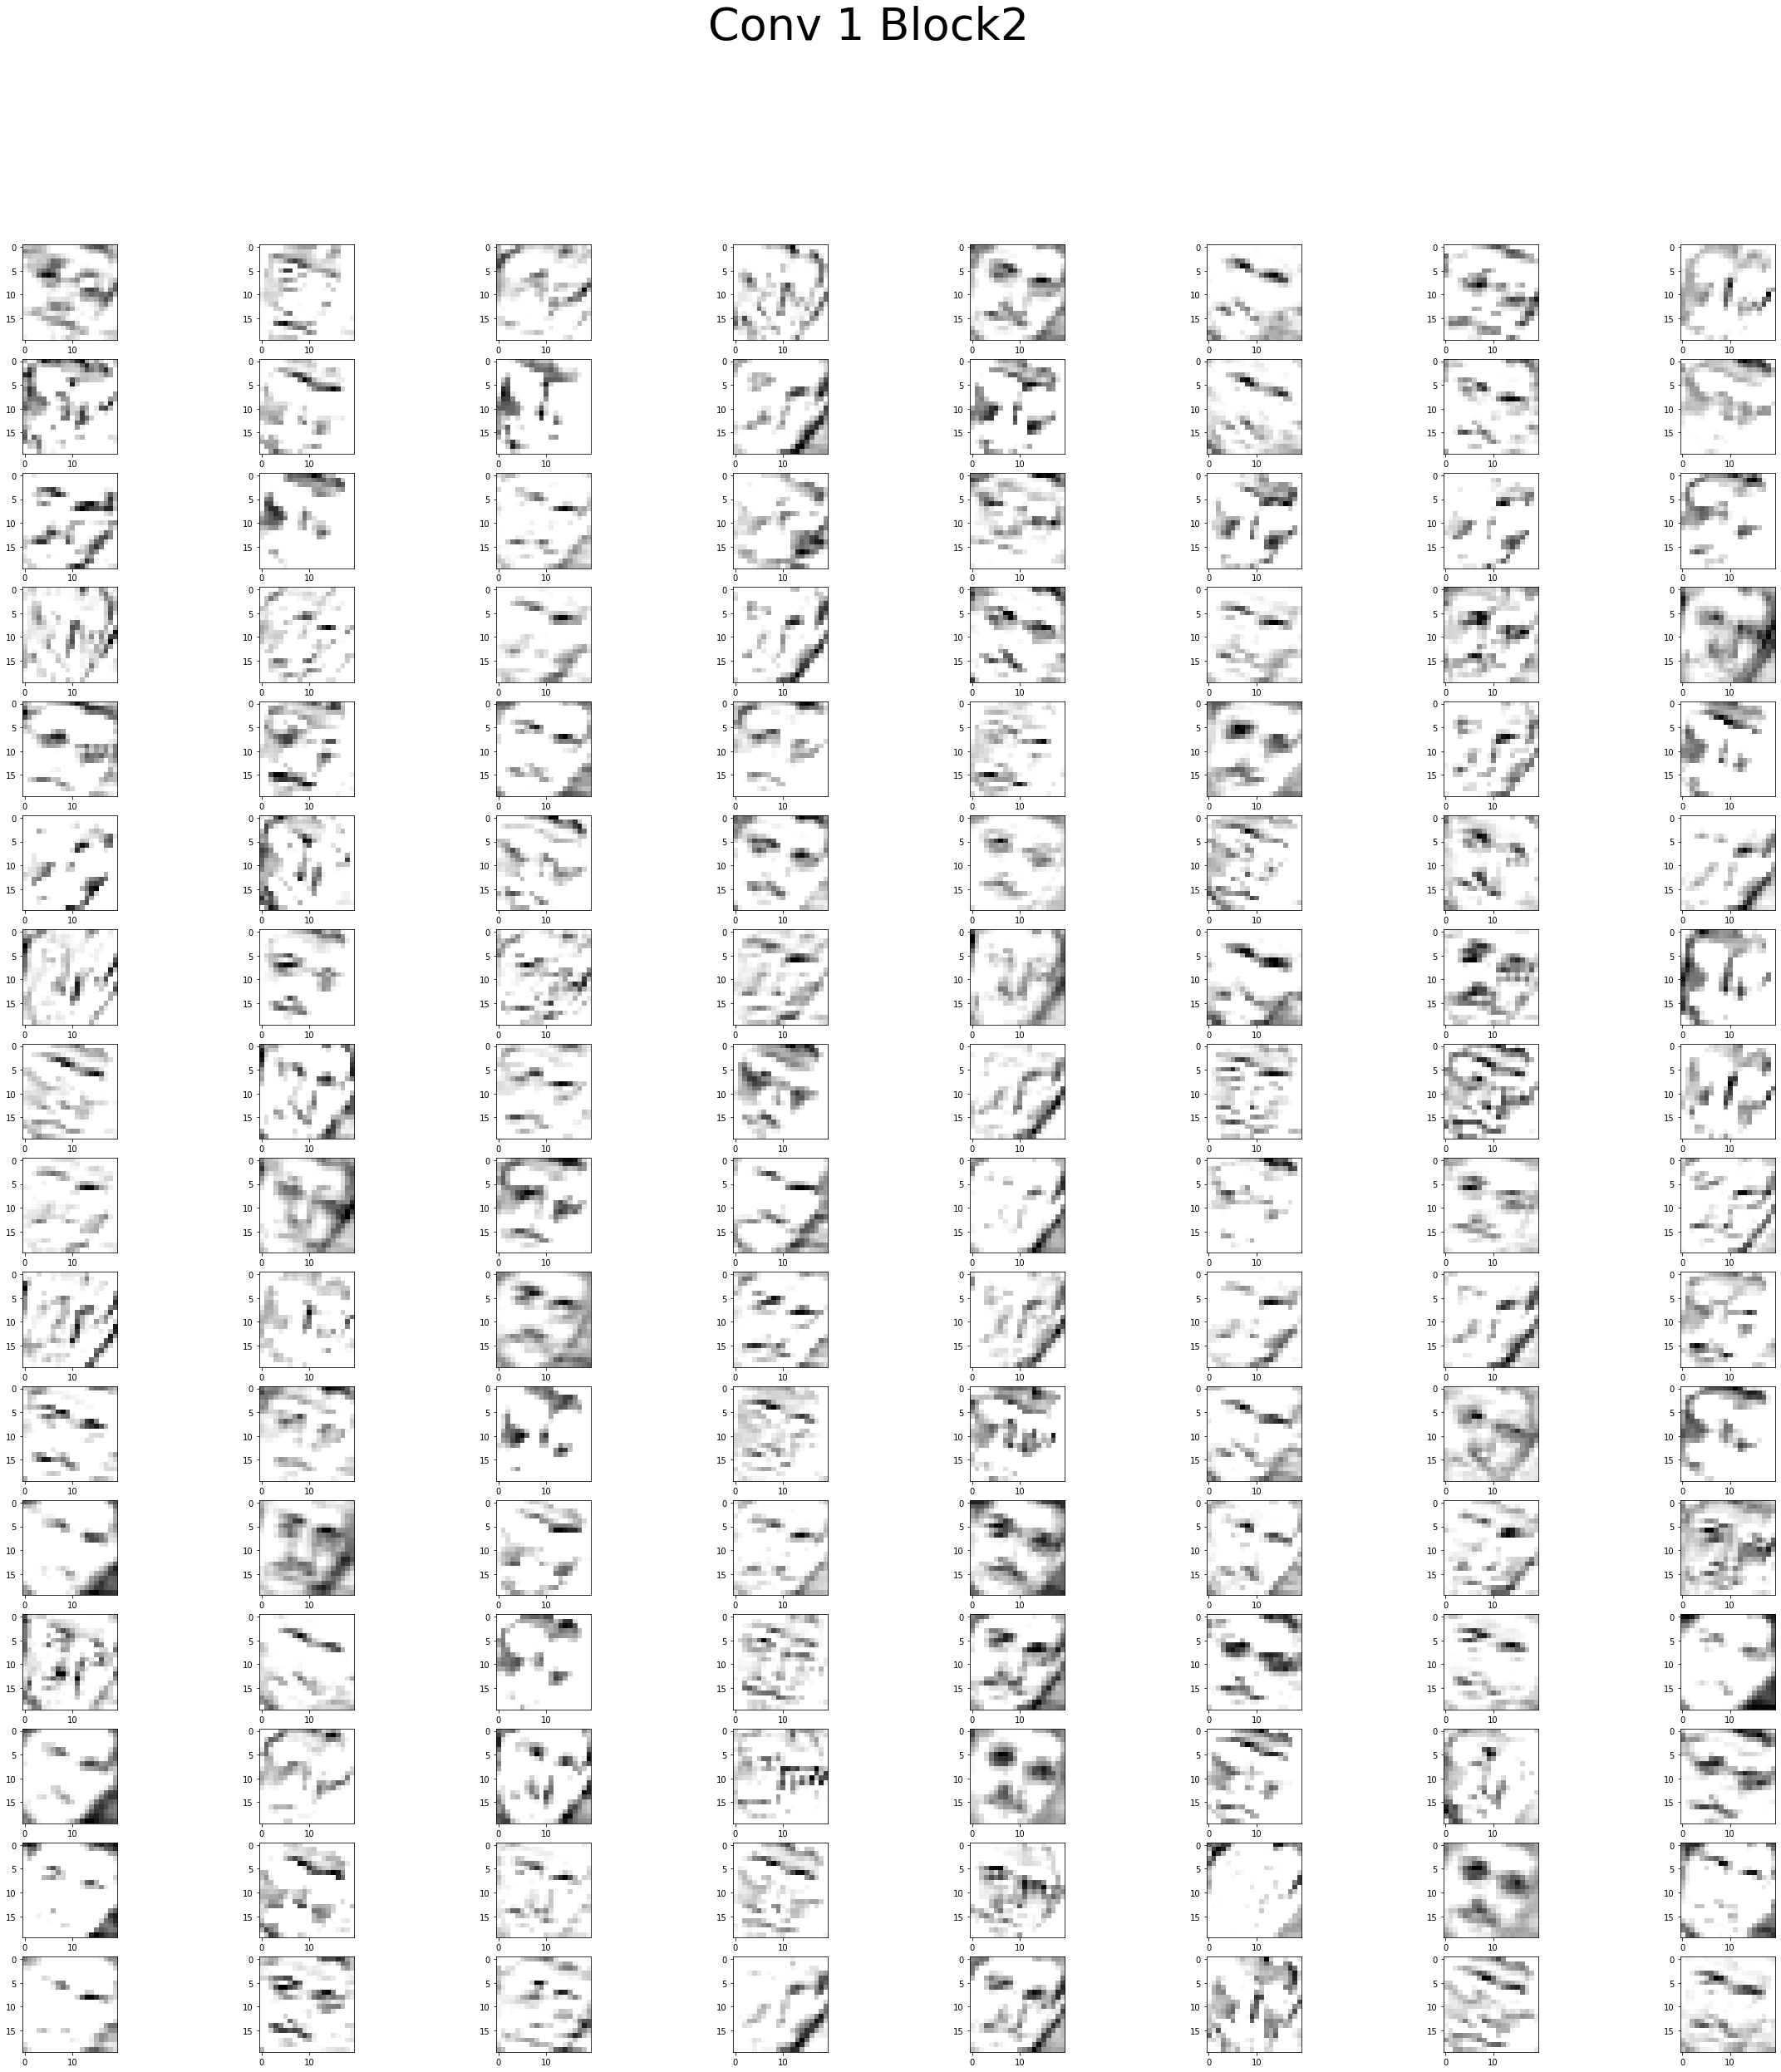

In [ ]:
display(16,8,activations[4],"Conv 1 Block2")

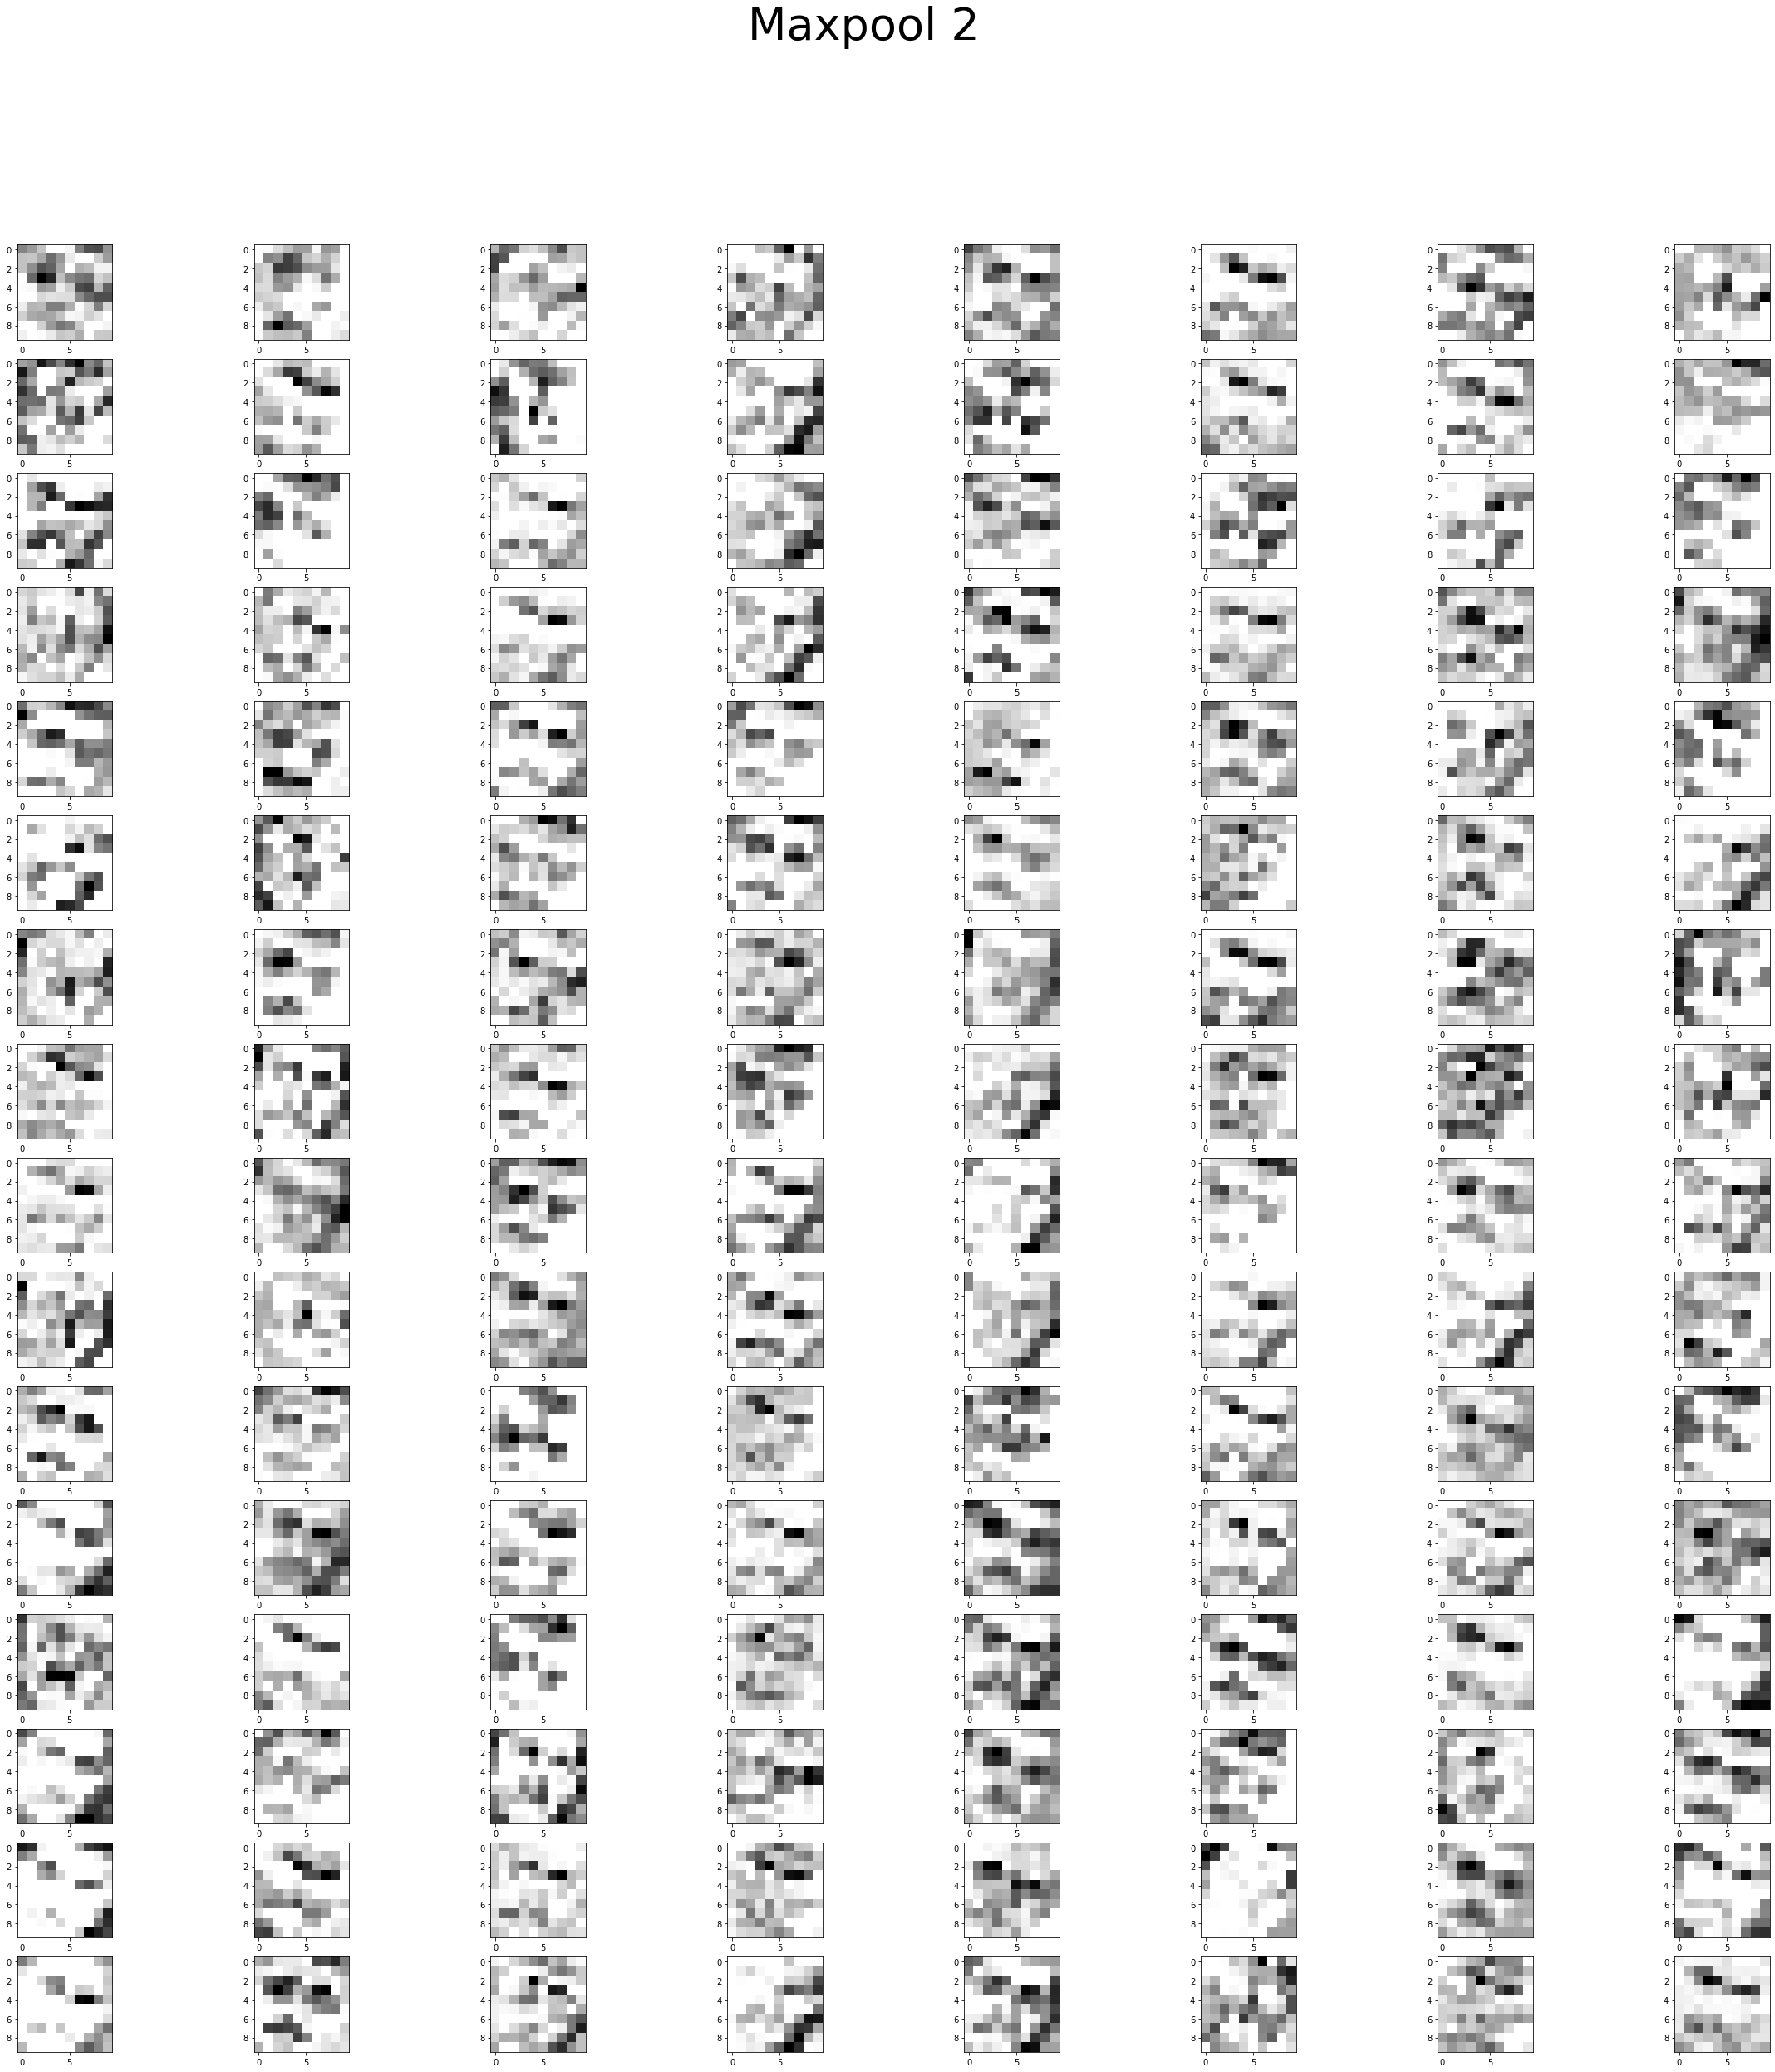

In [ ]:
display(16,8,activations[5],"Maxpool 2")

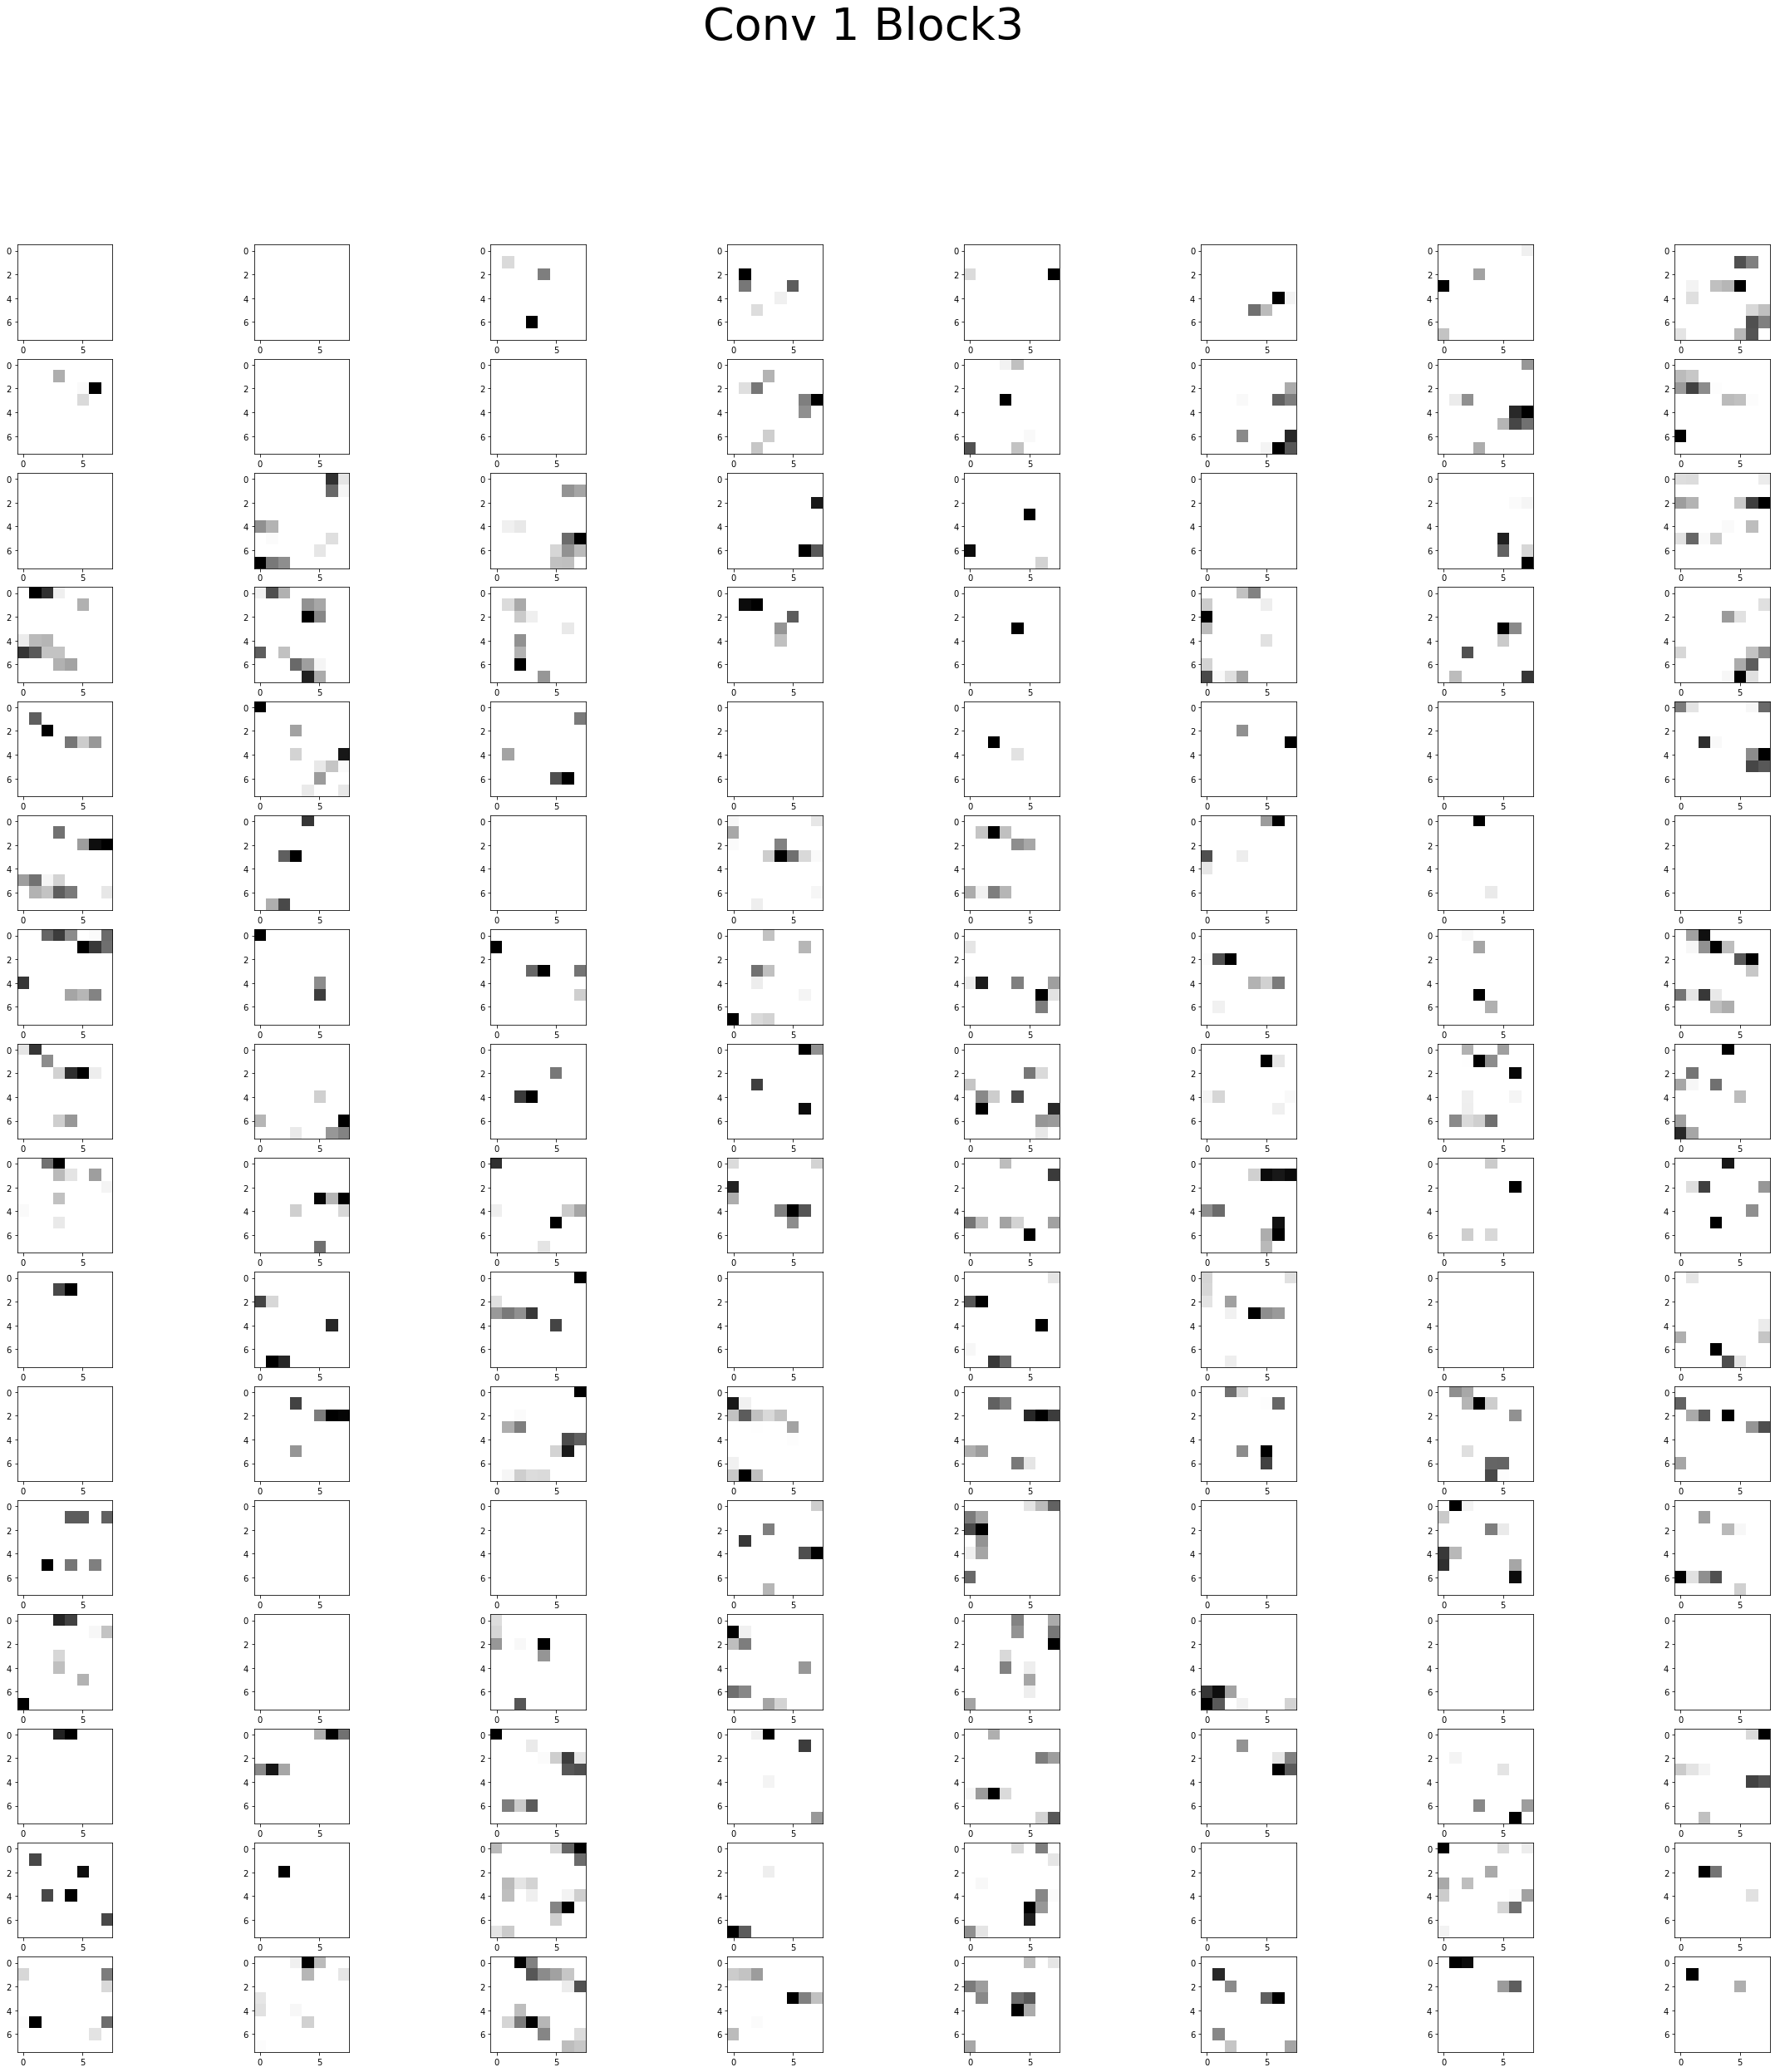

In [ ]:
display(16,8,activations[6],"Conv 1 Block3")

In [ ]:
for i in range(len(emotion_model.layers)):
    print(f"Layer : {i} Model:{emotion_model.layers[i].name}  shape:{emotion_model.layers[i].output_shape}")

Layer : 0 Model:conv2d  shape:(None, 46, 46, 32)
Layer : 1 Model:conv2d_1  shape:(None, 44, 44, 64)
Layer : 2 Model:max_pooling2d  shape:(None, 22, 22, 64)
Layer : 3 Model:dropout  shape:(None, 22, 22, 64)
Layer : 4 Model:conv2d_2  shape:(None, 20, 20, 128)
Layer : 5 Model:max_pooling2d_1  shape:(None, 10, 10, 128)
Layer : 6 Model:conv2d_3  shape:(None, 8, 8, 128)
Layer : 7 Model:max_pooling2d_2  shape:(None, 4, 4, 128)
Layer : 8 Model:dropout_1  shape:(None, 4, 4, 128)
Layer : 9 Model:flatten  shape:(None, 2048)
Layer : 10 Model:dense  shape:(None, 1024)
Layer : 11 Model:dropout_2  shape:(None, 1024)
Layer : 12 Model:dense_1  shape:(None, 7)


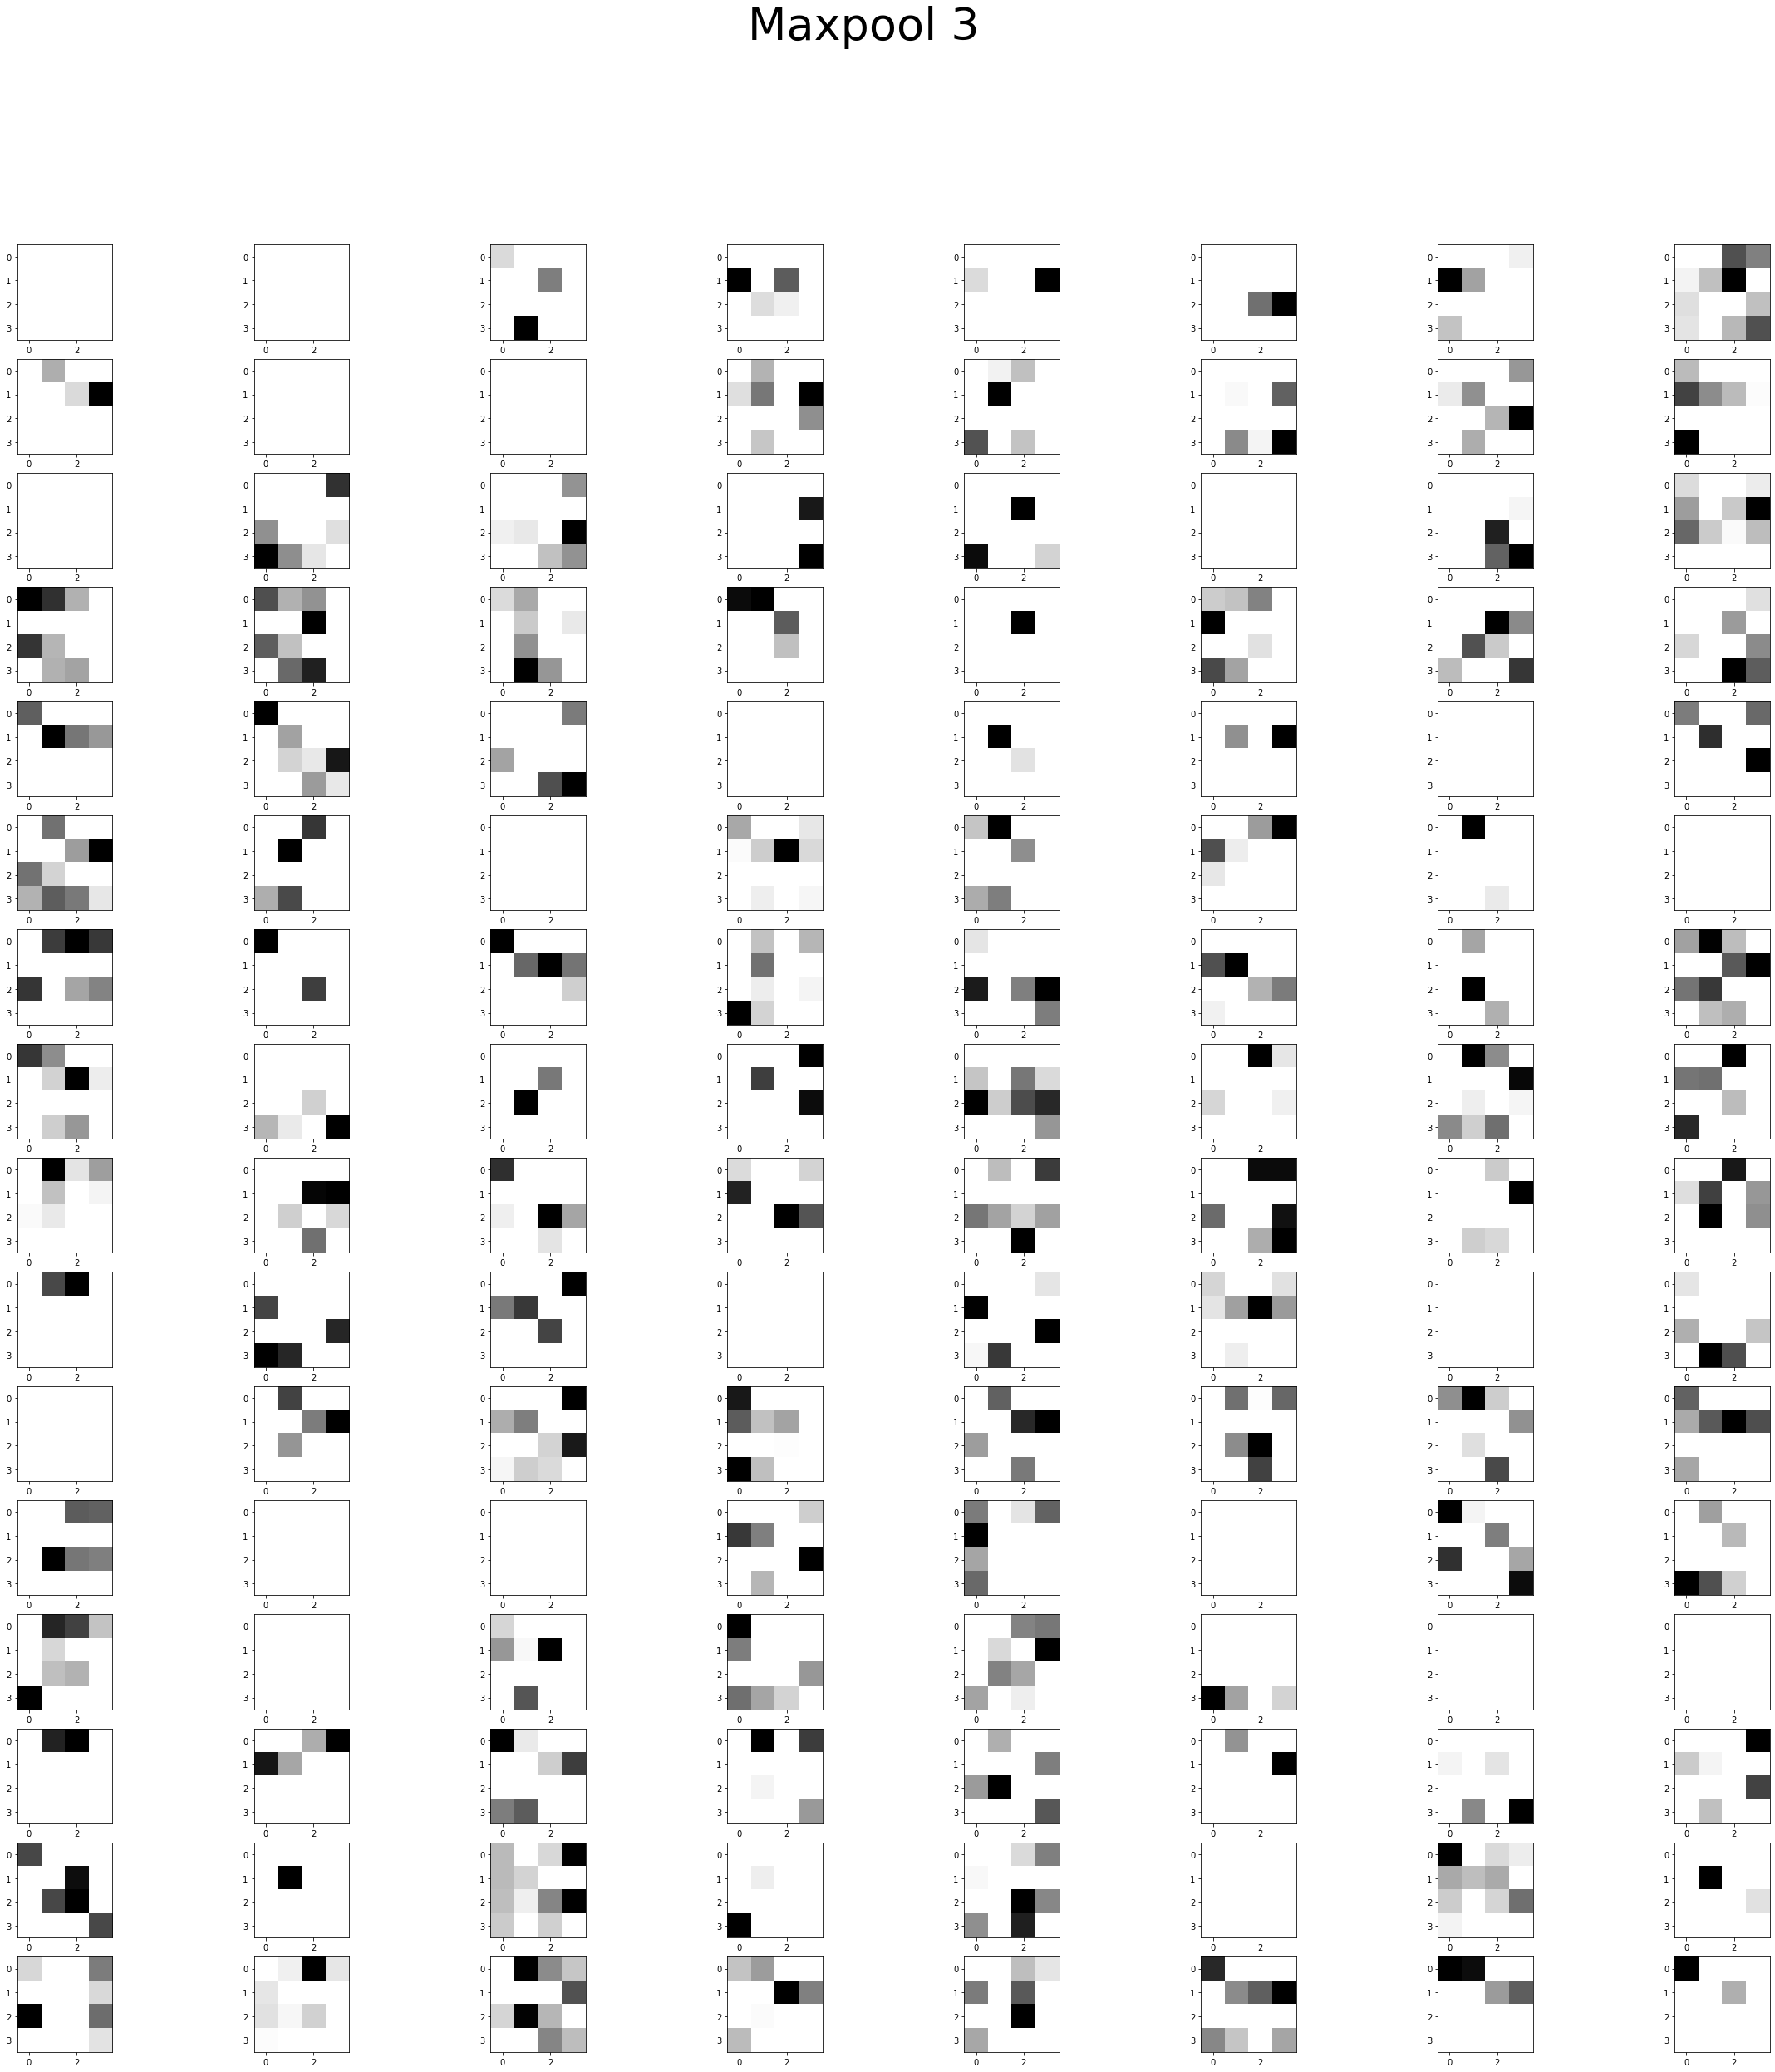

In [ ]:
display(16,8,activations[7],"Maxpool 3")
